In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

import warnings
warnings.filterwarnings("ignore")

## Dataset

In [3]:
train_data = datasets.FashionMNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST('data', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 8854280.53it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 169407.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3281634.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12799215.76it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [50]:
# shape of train_data
print(train_data.data.shape)
# shape of test_data
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


torch.Size([64, 1, 28, 28]) tensor(5)


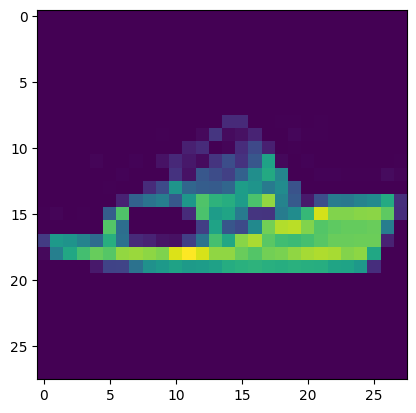

In [28]:
for img, lbl in train_loader:
    break

print(img.shape, lbl[0])
plt.imshow(img[0].squeeze())
plt.show()

## Model

In [39]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 5, 3, 1)
    self.conv2 = nn.Conv2d(5, 10, 3, 1)
    self.fc1 = nn.Linear(10*5*5, 100)
    self.fc2 = nn.Linear(100, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 10*5*5)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=250, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


## Training

In [41]:
epochs = 5
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(epochs):
  for img, lbl in train_loader:
    optimizer.zero_grad()
    out = model(img)
    loss = loss_fn(out, lbl)
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch}, Loss: {loss.item()}')

correct = 0
total = 0

with torch.no_grad():
  for img, lbl in test_loader:
    out = model(img)
    predicted = torch.max(out, 1)[1]
    correct += (predicted == lbl).sum()
    total += lbl.shape[0]

print(f'Accuracy: {correct/total}')

Epoch: 0, Loss: 0.2900417745113373
Epoch: 1, Loss: 0.2429075688123703
Epoch: 2, Loss: 0.1635528951883316
Epoch: 3, Loss: 0.2898210287094116
Epoch: 4, Loss: 0.311579167842865
Accuracy: 0.8748000264167786


## Prediction

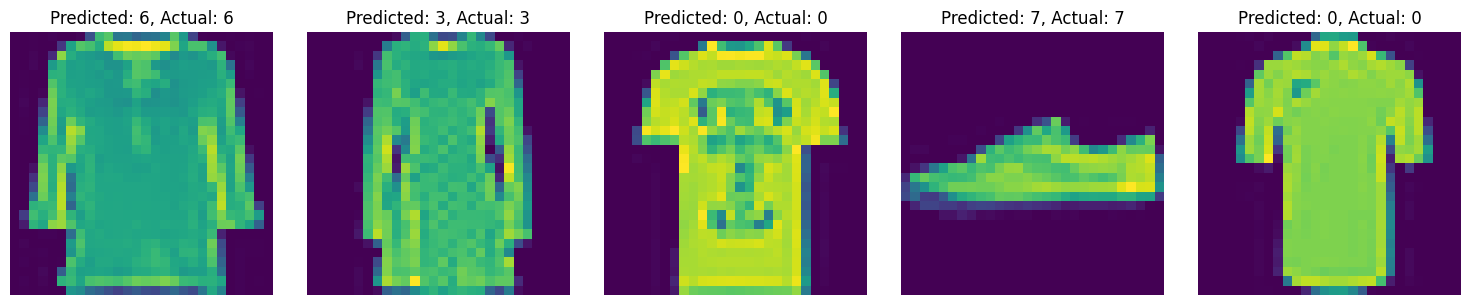

In [46]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Create a grid of 1 row and 5 columns
for i in range(5):
  axs[i].imshow(img[i].squeeze())  # Display the image in the i-th subplot
  axs[i].set_title(f'Predicted: {predicted[i]}, Actual: {lbl[i]}')  # Set the title of the subplot
  axs[i].axis('off')  # Hide the axis
plt.tight_layout()  # Adjust the layout
plt.show()